<a href="https://colab.research.google.com/github/n-shinde/PAR/blob/master/Copy_of_DATA_301_Lab_2A_Nidhi_Shinde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [3]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `https://dlsun.github.io/pods/data/sharktank.csv`. Read in the data into a Pandas `DataFrame`.



In [4]:
df_sharktank = pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv")
df_sharktank.set_index(["Company"], inplace=True)
df_sharktank.head()

,Season,No. in series,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
Company,,,,,,,,,,,,,,,,
Ava the Elephant,1.0,1.0,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mr. Tod's Pie Factory,1.0,1.0,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Wispots,1.0,1.0,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
College Foxes Packing Boxes,1.0,1.0,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ionic Ear,1.0,1.0,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [5]:
df_sharktank["Corcoran"].fillna(0)
df_sharktank["Cuban"].fillna(0)
df_sharktank["Greiner"].fillna(0)
df_sharktank["Herjavec"].fillna(0)
df_sharktank["John"].fillna(0)
df_sharktank["O'Leary"].fillna(0)
df_sharktank["Harrington"].fillna(0)
df_sharktank["Guest"].fillna(0)

Company
Ava the Elephant               0.0
Mr. Tod's Pie Factory          0.0
Wispots                        0.0
College Foxes Packing Boxes    0.0
Ionic Ear                      0.0
                              ... 
You Kick Ass                   0.0
Shark Wheel                    1.0
Gato Cafe                      0.0
Sway Motorsports               0.0
Spikeball                      0.0
Name: Guest, Length: 495, dtype: float64

Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [7]:
# Amount and equity are being treated as categorical variables 
#   because there are special symbols included with each numerical value ($/%)

# Remove special characters
df_sharktank["Amount"] = df_sharktank["Amount"].astype(str).str.replace("$", "", regex = True)
df_sharktank["Amount"] = df_sharktank["Amount"].astype(str).str.replace(",", "", regex = True)
df_sharktank["Amount"] = df_sharktank["Amount"].fillna(0)
df_sharktank["Amount"] = df_sharktank["Amount"].astype(float)


df_sharktank["Equity"] = df_sharktank["Equity"].astype(str).str.replace("%", "", regex = True)
df_sharktank["Equity"] = df_sharktank["Equity"].fillna(0)
df_sharktank["Equity"] = df_sharktank["Equity"].astype(float)

## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [8]:
df_sharktank["Valuation"] = df_sharktank["Amount"].divide(0.01*(df_sharktank["Equity"]))
# Used nlargest() to find highest value that isn't inf
df_sharktank["Valuation"].nlargest(10) 

# Zipz is the most valuable at an evaluation of $25,000,000.

# Check to see which company got max investment
df_sharktank["Amount"].nlargest(2) # How to find company name given max we found with .max()?
# df_sharktank["Amount"].idxmax() # Can also use this to get ID of max

# Air Car got the largest total investment at $5,000,000, but it wasn't the most valuable company.

Company
AirCar           5000000.0
SynDaver Labs    3000000.0
Name: Amount, dtype: float64

Zipz was the most valuable company at an evaluation of \$25,000,000.  Although AirCar received the largest total investment of \$5,000,000, they were not considered to be the most valuable company; this is probably because a higher equity decreases the company's evaluation.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [31]:
names = ["Corcoran", "Greiner", "Herjavec", "John", "O\'Leary", "Harrington", "Guest"]
df_sharktank["Num_Invested"] = df_sharktank[names].sum(axis = 1)
df_sharktank["Individual_Amount"] = df_sharktank["Amount"].divide(df_sharktank["Num_Invested"])
df_money = df_sharktank[df_sharktank["Num_Invested"] != 0]
top_shark = df_money[names].multiply(df_money["Amount"], axis = 0).sum().max()
top_shark

# How to find shark that corresponds with this?

21875000.0

**YOUR EXPLANATION HERE**

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

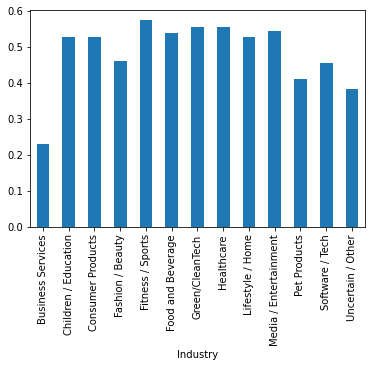

In [69]:
industries = ["Food and Beverage", "Fashion / Beauty", "Lifestyle / Home", "Children / Education",
              "Fitness / Sports", "Software / Tech", "Consumer Products", "Healthcare",
              "Pet Products", "Business Services", "Uncertain / Other", "Media / Entertainment",
              "Green/CleanTech"]

df_sharktank["Deal_Num"] = df_sharktank["Deal"].map({
    "Yes":1,
    "No":0
})

df_sorted_shark = df_sharktank.sort_values(by = "Industry")
df_total = df_sorted_shark["Industry"].value_counts(sort = False)

df_deal = df_sharktank[df_sharktank["Deal"] == "Yes"]
df_deal_by_industry = df_deal.groupby("Industry")["Deal_Num"].sum()

df_funding_rate = df_deal_by_industry.divide(df_total)
df_funding_rate
df_funding_rate.plot.bar()

The industry with the highest funding rate was Sports/Fitness at around 57.5%, while the industry with the lowest funding rate was Business Services at just 23.1%. 

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2A - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.